## 0.An end to end Scikit-Learn Workflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1.Getting our data ready to be used with machine learning

Three main things we have to do
* Split the data into features and labels (Usually 'X' & 'Y')
* Filling( also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values(also called feature encoding)

In [3]:
# Create X (Feature matrix)
X=heart_disease.drop('target',axis=1)

# create Y(Labels)
Y=heart_disease['target']

* For Structured data use the `RandomForestClassifier` for better result
* For Unstructured data use `deep learning or trasfer learning`

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape[0]*0.8

242.4

In [8]:
242+61

303

In [9]:
clf.fit(X_train,Y_train);

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2


In [11]:
# make a prediction
Y_pred=clf.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
np.array([Y_test])

array([[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [13]:
# 4. Evaluate the model on the training and test data
clf_single_fold_score=clf.score(X_test,Y_test)
clf_single_fold_score

0.8360655737704918

Evaluating a model using the `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,Y,scoring=None,cv=5) #5 random fold

array([0.83606557, 0.85245902, 0.78688525, 0.78333333, 0.76666667])

In [15]:
clf_cross_val_score=np.mean(cross_val_score(clf,X,Y,scoring=None,cv=5))
clf_single_fold_score,clf_cross_val_score
# Always pick the cross_val_score beacuase dataset is folded to 
# training and test data randomly 5 times

(0.8360655737704918, 0.8282513661202184)

In [36]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring='accuracy')
cv_acc.mean()

0.8314207650273225

In [37]:
np.random.seed(42)
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring='precision')
cv_precision.mean()

0.839573420354405

In [38]:
np.random.seed(42)
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring='recall')
cv_recall.mean()

0.8606060606060606

In [39]:
np.random.seed(42)
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring='f1')
cv_f1.mean()

0.8489786535612966

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.In essence,an idea of where the model is getting confused:

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Classification report
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.71      0.80        28\n           1       0.79      0.94      0.86        33\n\n    accuracy                           0.84        61\n   macro avg       0.85      0.83      0.83        61\nweighted avg       0.85      0.84      0.83        61\n'

In [17]:
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[20,  8],
       [ 2, 31]], dtype=int64)

In [18]:
#visualize confusion matrix
pd.crosstab(Y_test,Y_pred,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,20,8
1,2,31


(2.0, 0.0)

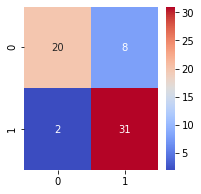

In [19]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(conf_mat,cmap='coolwarm',annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [20]:
accuracy_score(Y_test,Y_pred)

0.8360655737704918

**Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

**ROC curves are a comparison of a model's true positive & model's false positive rate**
* True Positive=model predict 1 when truth is 1
* False Positive=model predicts 1 when truth is 0
* True negative=model predicts 0 when truth is 0
* False negative=model predicts 0 when truth is 1

In [21]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.06, 0.84, 0.07, 0.12, 0.66, 0.62, 0.45, 0.13, 0.48, 0.6 ])

In [22]:
# Calculate fpr,tpr & thresholds
fpr,tpr,thresholds=roc_curve(Y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03571429,
       0.03571429, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.10714286, 0.10714286, 0.14285714, 0.14285714, 0.14285714,
       0.17857143, 0.17857143, 0.21428571, 0.21428571, 0.28571429,
       0.28571429, 0.35714286, 0.42857143, 0.42857143, 0.5       ,
       0.64285714, 0.67857143, 0.67857143, 0.71428571, 0.78571429,
       1.        ])

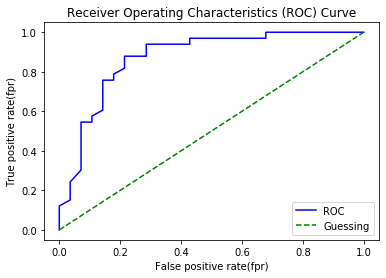

In [23]:
def plot_roc_curve(fpr,tpr):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, 'b',label='ROC') # blue line
    ax.plot([0,1],[0,1], 'g--',label='Guessing') # green dashed line
    ax.legend()
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(fpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
plot_roc_curve(fpr,tpr)

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.8717532467532467

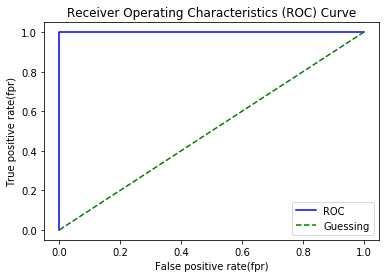

In [25]:
# Plot perfect ROC Curve and AUC score
fpr,tpr,thresholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [26]:
#Perfect AUC Score
roc_auc_score(Y_test,Y_test)

1.0

In [27]:
# 5.Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test) * 100}%\n")

Trying model with 10 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 20 estimators...
Model accuracy on test set: 78.68852459016394%

Trying model with 30 estimators...
Model accuracy on test set: 83.60655737704919%

Trying model with 40 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 50 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 60 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 70 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 80 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 90 estimators...
Model accuracy on test set: 83.60655737704919%



In [28]:
# 6.Save a model and load it
import pickle
pickle.dump(clf,open("rand_forest_model_1.pkl","wb"))

In [29]:
loaded_model=pickle.load(open("rand_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8360655737704918

### Let's choose another model for classification

In [30]:
from sklearn.svm import LinearSVC
np.random.seed(42)
svc=LinearSVC(max_iter=10000)
svc.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [31]:
svc.score(X_test,Y_test)

0.5573770491803278

In [32]:
clf.score(X_test,Y_test) # RandomForest

0.8360655737704918

In [33]:
# Another way of predictions by Comparing to truth labels to-
#evaluate a model
y_preds=svc.predict(X_test)
np.mean(y_preds==Y_test)

0.5573770491803278

Make Predictions with `predict_proba()` for each test samples

In [34]:
# predict_proba() returns probabilities of classification label
clf.predict_proba(X_test[:5]) # [Not Heart_disease,heart_disease]

array([[0.87777778, 0.12222222],
       [0.16666667, 0.83333333],
       [0.95555556, 0.04444444],
       [0.9       , 0.1       ],
       [0.4       , 0.6       ]])

In [35]:
clf.predict(X_test[:5])
#1st sample has probability of not heart_disease is=0.93
#2ns sample has prob of having heart_disease is=0.92

array([0, 1, 0, 0, 1], dtype=int64)